
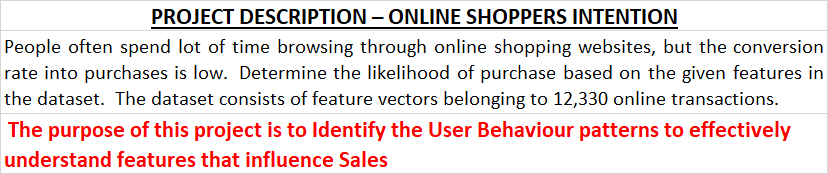

## FEATURE ANALYSIS

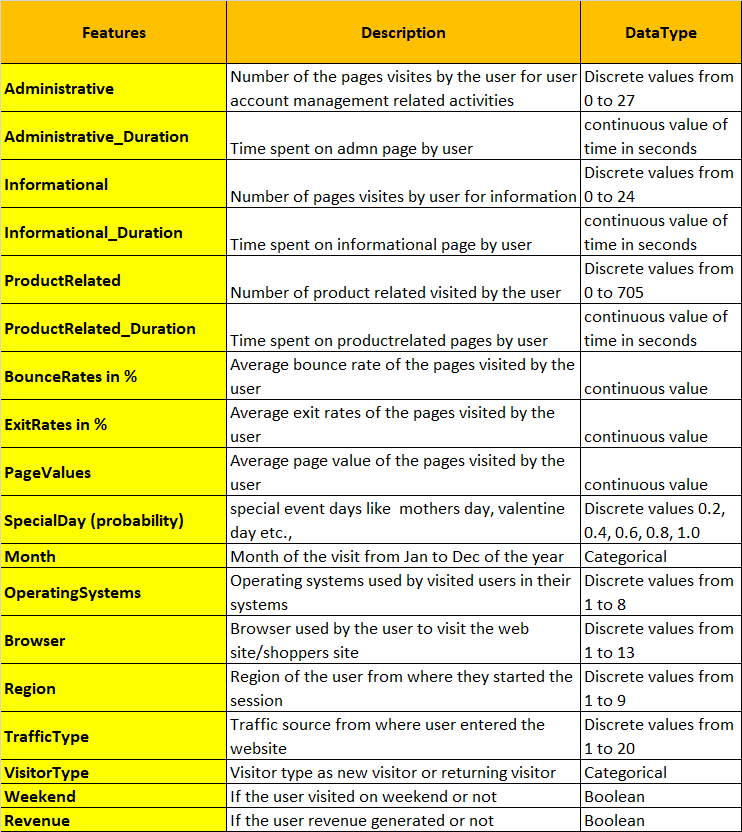


In [1]:
# Import basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

# import warnings to ignore unnecessary warnings 
import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns', None)

In [2]:
#os.cwd

In [3]:
df = pd.read_csv("~/Downloads/Learnbay Datascience/online_shoppers_intention.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [4]:
df.shape

(12330, 18)

In [5]:
df.info()

# there are total 18 features in the dataset out of which one feature i.e., Revenue feature is Target variable. 
# Rest 17 features are Predictive variable.
# 7 features are numerical discrete variables.
# 7 features are numerical continuous variables. We need to apply scaling on these numerical features if required
# 2 features are categorical and 2 features are boolean variables. We need to convert them to numerical or get dummies.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Administrative            12330 non-null  int64  
 1   Administrative_Duration   12330 non-null  float64
 2   Informational             12330 non-null  int64  
 3   Informational_Duration    12330 non-null  float64
 4   ProductRelated            12330 non-null  int64  
 5   ProductRelated_Duration   12330 non-null  float64
 6   BounceRates in %          12330 non-null  float64
 7   ExitRates in %            12330 non-null  float64
 8   PageValues                12330 non-null  float64
 9   SpecialDay (probability)  12330 non-null  float64
 10  Month                     12330 non-null  object 
 11  OperatingSystems          12330 non-null  int64  
 12  Browser                   12330 non-null  int64  
 13  Region                    12330 non-null  int64  
 14  Traffi

In [6]:
# Label encoding of Revenue

from sklearn.preprocessing import LabelEncoder



In [7]:
le = LabelEncoder()
df['Revenue'] = le.fit_transform(df['Revenue'])
df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [8]:
# splitting the dependent and independent variable columns

X = df.drop(['Revenue'], axis = 1)
y = df['Revenue']

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates in %,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates in %,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay (probability),12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [10]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates in %,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates in %,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay (probability),-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


<AxesSubplot:>

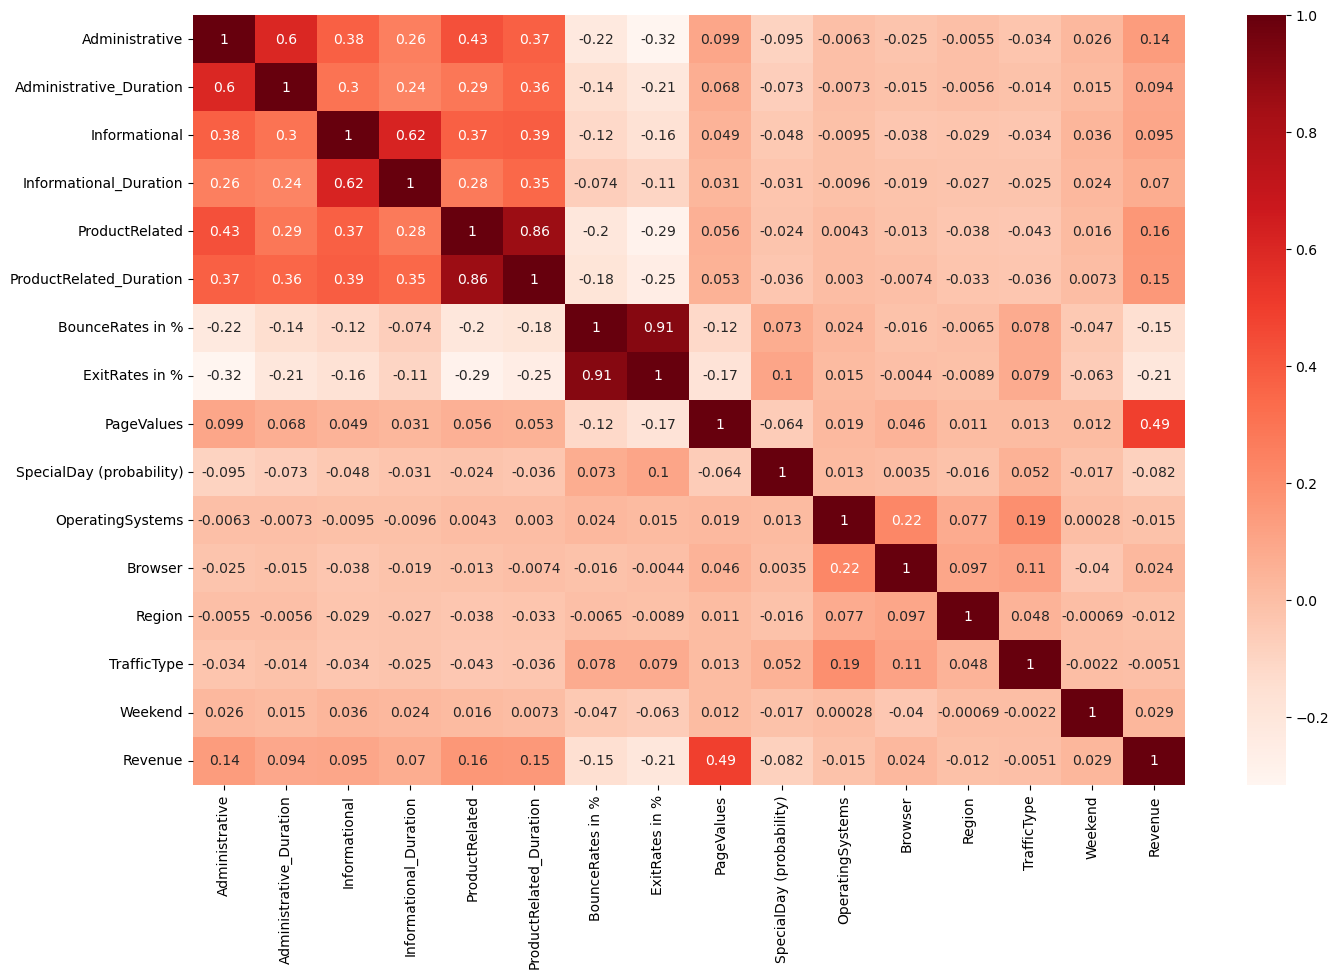

In [11]:
plt.figure(figsize = (16,10))
sns.heatmap(data = df.corr(), cmap = 'Reds', annot = True)

In [12]:
# OBSERVATIONS ON CORRELATION AND HEAT MAP
# Based on above correlation and heat map observations it is found that only Page values have relation with Revenue
# There is a slight relation observed with Product related and Admn related features with Revenue.
# There is also multicollinearity observed between Bouncerates and Exitrates.

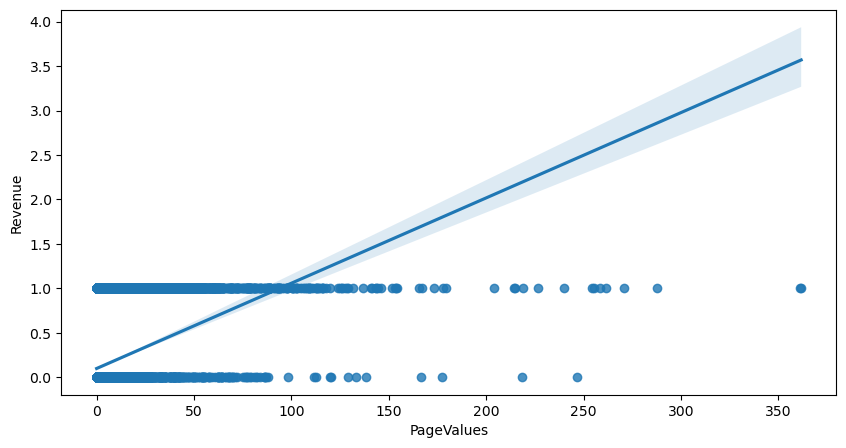

In [13]:
plt.figure(figsize = (10,5))
sns.regplot(x= 'PageValues', y = 'Revenue' , data = df)
plt.show()

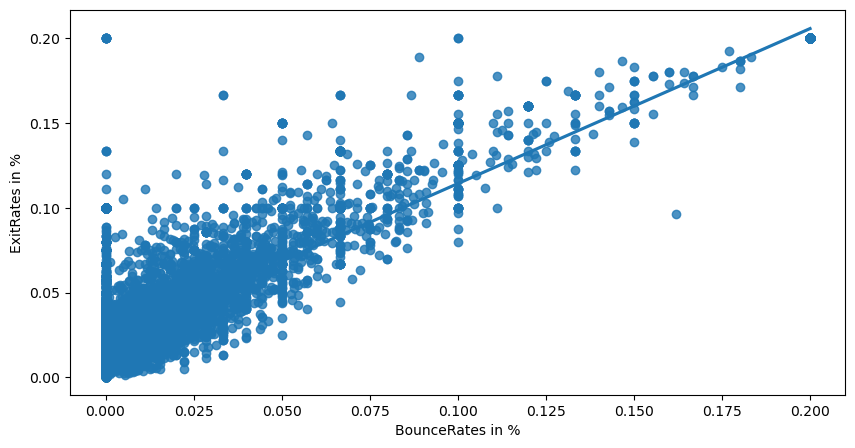

In [14]:
plt.figure(figsize = (10,5))
sns.regplot(x= 'BounceRates in %', y = 'ExitRates in %' , data = df)
plt.show()

# TARGET ANALYSIS

In [15]:
df['Revenue'].value_counts(normalize = True)

# Shows 84.5% of page visits not converted to Revenue
# Only 15.5% of page visits converted to Revenue



0    0.845255
1    0.154745
Name: Revenue, dtype: float64

<AxesSubplot:xlabel='Revenue', ylabel='count'>

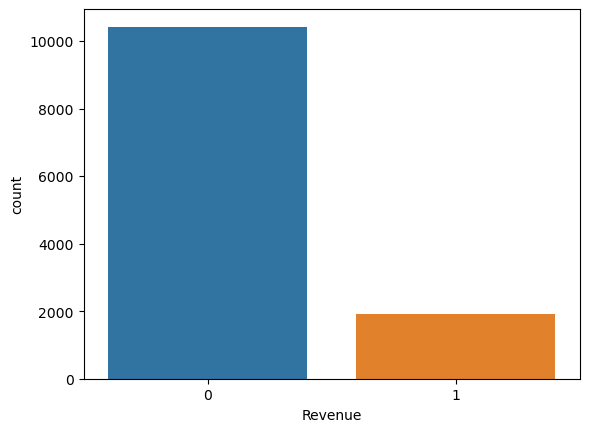

In [16]:
# plotting count plot for Revenue for better visualization
sns.countplot(data = df, x = 'Revenue')

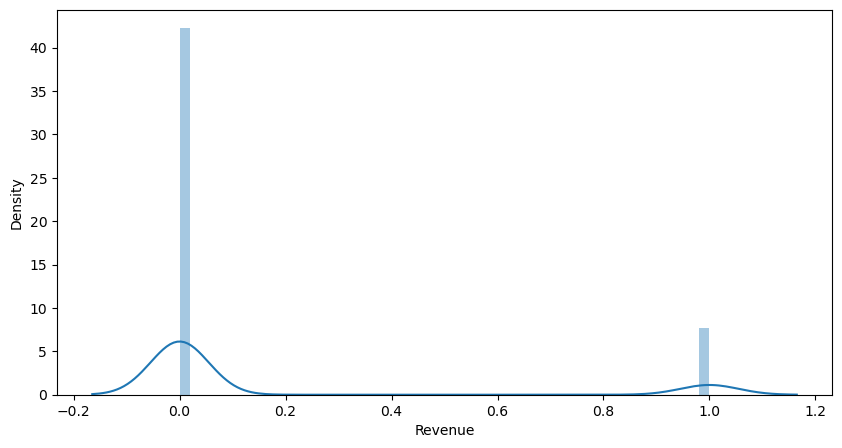

In [17]:
#plot the Revenue
plt.figure(figsize = (10,5))
sns.distplot(df['Revenue'])
plt.show()

# A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the 
# overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to 
# depict the distplot with different variations in it.

# Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable.
# It is used for non-parametric analysis. Setting the hist flag to False in distplot will yield the kernel density 
# estimation plot. kde function is used to plot the data against a single/univariate variable.

In [18]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates in %', 'ExitRates in %', 'PageValues',
       'SpecialDay (probability)', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

# Univariate Analysis of numerical discrete features


Weekend

Operating System

Browser

Month

VistorType

TrafficType

Region

In [19]:
df['Weekend'].value_counts(normalize = True)

# Only 23% page visits happened in weekends
# Rest of 77% visits happened in other days.

False    0.767397
True     0.232603
Name: Weekend, dtype: float64

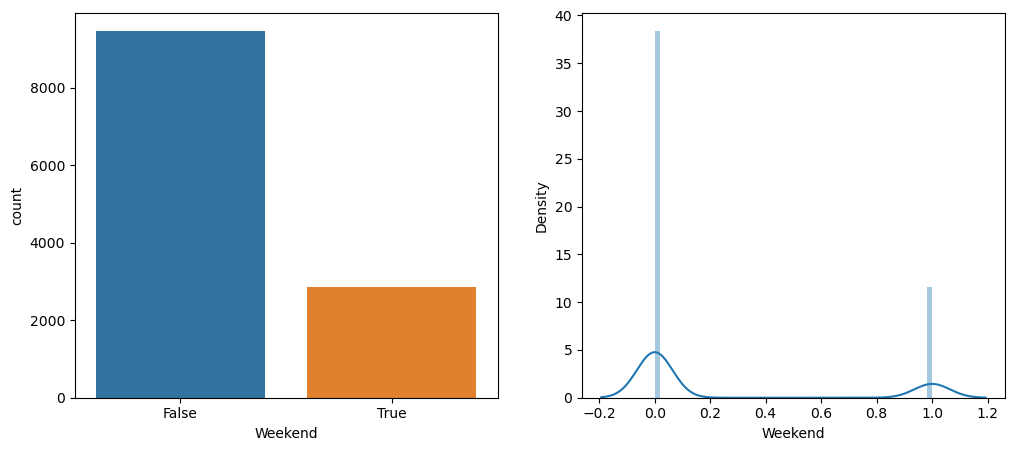

In [20]:
# Plot each feature to understand about each data
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x = 'Weekend' )
plt.subplot(1,2,2)
sns.distplot(df['Weekend'])
plt.show()


In [21]:
df['Month'].value_counts(normalize = True)

# It is observed that May leading with 27% page visits followed by Nov with 24% 
# Next level observed with March and December with 15% and 14% page visits rest of the month negligible.

May     0.272830
Nov     0.243147
Mar     0.154663
Dec     0.140065
Oct     0.044526
Sep     0.036334
Aug     0.035118
Jul     0.035036
June    0.023358
Feb     0.014923
Name: Month, dtype: float64

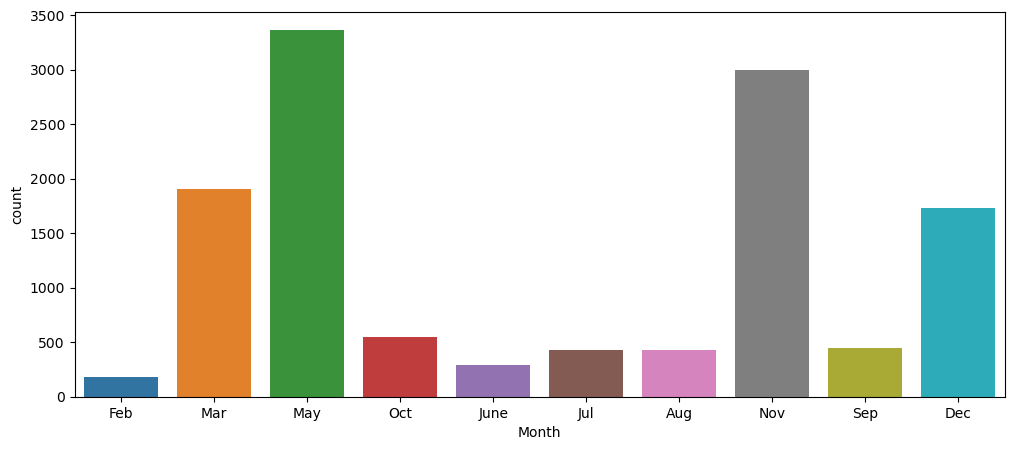

In [22]:
# Plot each feature to understand about each data
plt.figure(figsize = (12,5))
#plt.subplot(1,2,1)
sns.countplot(data = df, x = 'Month')
#plt.subplot(1,2,2)
#plt.pie(df['Month'])
plt.show()

# It is observed that maximum page visits happened in May, Nov, Dec and Mar months.
# Highest Revenue generated page visits happened in Nov month and then in May month.

In [23]:
df['OperatingSystems'].value_counts(normalize = True)

# It is observed that OS2 leading with 53.5% page visits followed by 1,3 OS  with 20% each.
# Rest of the operating systems effect is negligible.

2    0.535361
1    0.209651
3    0.207218
4    0.038767
8    0.006407
6    0.001541
7    0.000568
5    0.000487
Name: OperatingSystems, dtype: float64

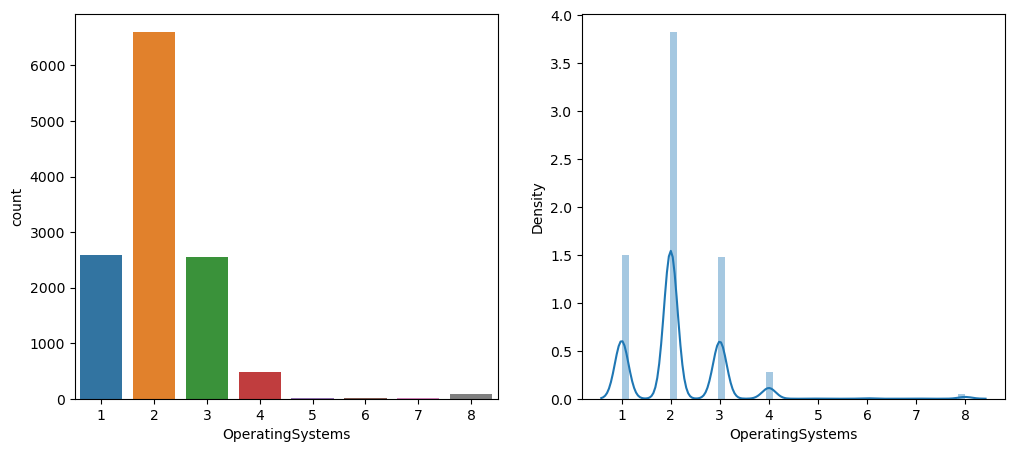

In [24]:
# Plot each feature to understand about each data
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x = 'OperatingSystems')
plt.subplot(1,2,2)
sns.distplot(df['OperatingSystems'])
plt.show()

# Maximum page visits and Revenue generated page visits observed from user used operating system 2
# Next level of page visits and Revenue generated page visits observed from users used operating systems 1,3
# There is no significant observations from other operating systems.

In [25]:
df['Browser'].value_counts(normalize = True)

# It is observed that Browser 2 leading with 65% page visits followed by Browser 1 with 20% 
# page visits from rest of the browsers is negligible.

2     0.645661
1     0.199676
4     0.059692
5     0.037875
6     0.014112
10    0.013220
8     0.010949
3     0.008516
13    0.004947
7     0.003974
12    0.000811
11    0.000487
9     0.000081
Name: Browser, dtype: float64

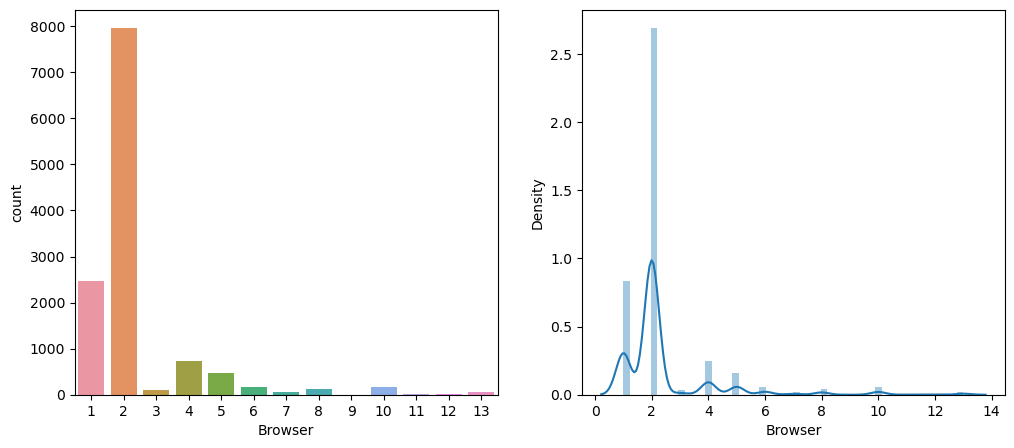

In [26]:
# Plot each feature to understand about each data
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x = 'Browser')
plt.subplot(1,2,2)
sns.distplot(df['Browser'])
plt.show()

# Highest page visits and revenue generated page visits observed from Browser 2
# Followed by page visits of Browsers 1, 4,5 some level of page visits observed.

In [27]:
df['Region'].value_counts(normalize = True)

# It is observed that Region 1 leading with 39% page visits followed by 3 with 20% 
# Next level observed with Regions 4 and 2 with 9% each page visits rest of the regions contribution is not considerable.

1    0.387672
3    0.194891
4    0.095864
2    0.092133
6    0.065288
7    0.061719
9    0.041444
8    0.035199
5    0.025791
Name: Region, dtype: float64

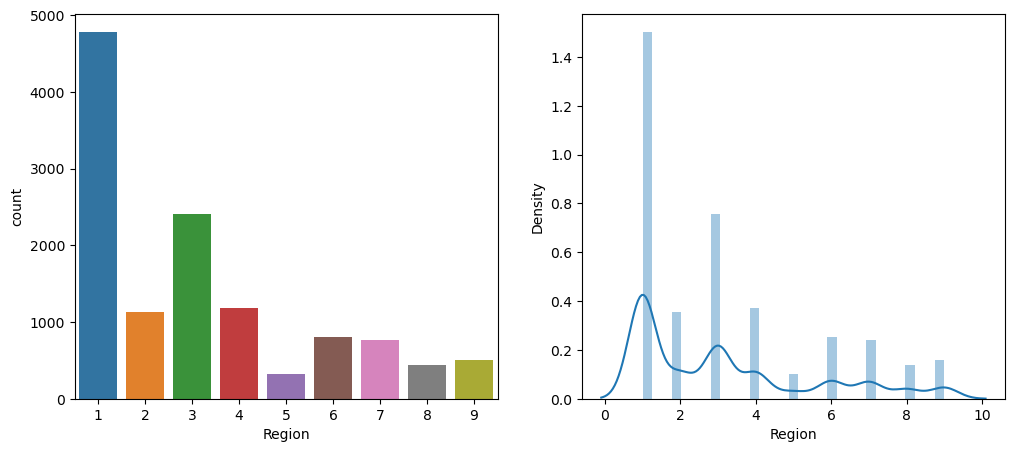

In [28]:
# Plot each feature to understand about each data
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x = 'Region')
plt.subplot(1,2,2)
sns.distplot(df['Region'])
plt.show()

# Highest page visits and revenue generated page visits observed from Region 1
# Followed by page visits of Regions 3, 4,2 some level of page visits observed.

In [29]:
df['TrafficType'].value_counts(normalize = True)  # ', 'VisitorType

# It is observed that Traffic type 2 leading with 31% page visits followed by 1 with 20% 
# Next level observed with Traffic type 3 and 4  with 16% and 8% page visits rest of the types shown negligible visits.

2     0.317356
1     0.198783
3     0.166423
4     0.086699
13    0.059854
10    0.036496
6     0.036010
8     0.027818
5     0.021087
11    0.020032
20    0.016058
9     0.003406
7     0.003244
15    0.003082
19    0.001379
14    0.001054
18    0.000811
16    0.000243
12    0.000081
17    0.000081
Name: TrafficType, dtype: float64

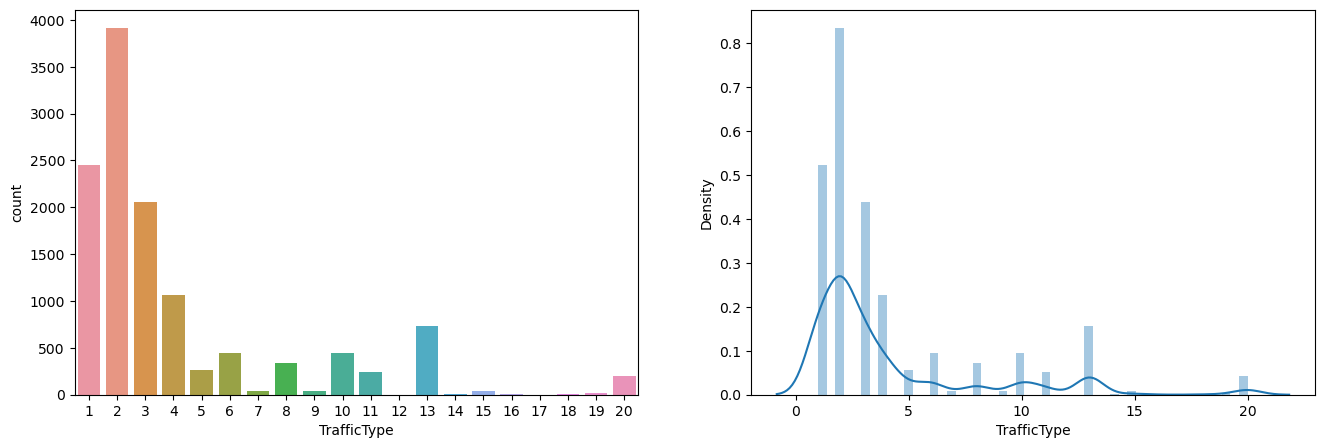

In [30]:
# Plot each feature to understand about each data
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x = 'TrafficType')
plt.subplot(1,2,2)
sns.distplot(df['TrafficType'])
plt.show()

# Highest page visits and revenue generated page visits observed from Traffictype 2
# Followed by page visits of Traffictypes 1, 3,4 some level of page visits observed.


In [31]:
df['VisitorType'].value_counts(normalize = True)

# It is observed that Returning Visitor type customers page visits are 86% which is contributing to max revenue 
# Next level observed with New visitor and Others with 14% page visits.

Returning_Visitor    0.855718
New_Visitor          0.137388
Other                0.006894
Name: VisitorType, dtype: float64

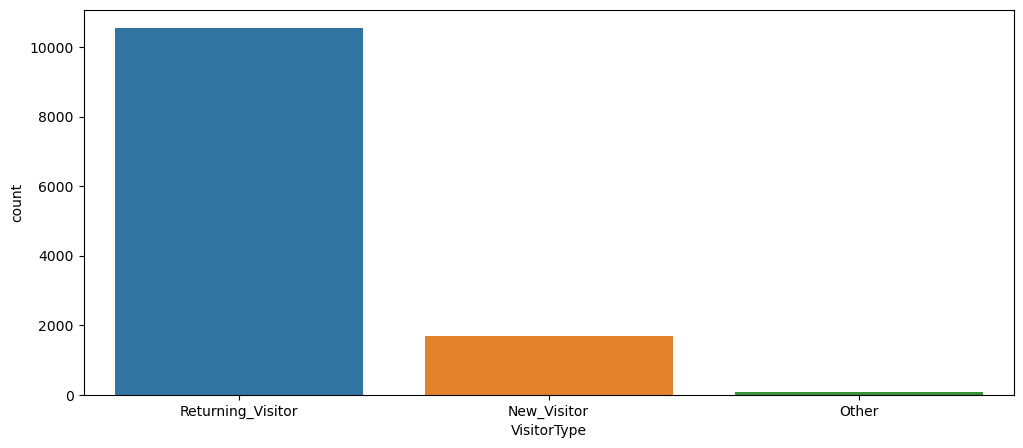

In [32]:
# Plot each feature to understand about each data
plt.figure(figsize = (12,5))
sns.countplot(data = df, x = 'VisitorType')
plt.show()

# Highest page visits and revenue generated page visits observed from Returning Visitor 
# Followed by page visits of New visitors.


In [33]:
df['SpecialDay (probability)'].value_counts(normalize = True)

# It is observed that May leading with 27% page visits followed by Nov with 24% 
# Next level observed with March and December with 15% and 14% page visits rest of the month negligible.

0.0    0.898540
0.6    0.028467
0.8    0.026358
0.4    0.019708
0.2    0.014436
1.0    0.012490
Name: SpecialDay (probability), dtype: float64

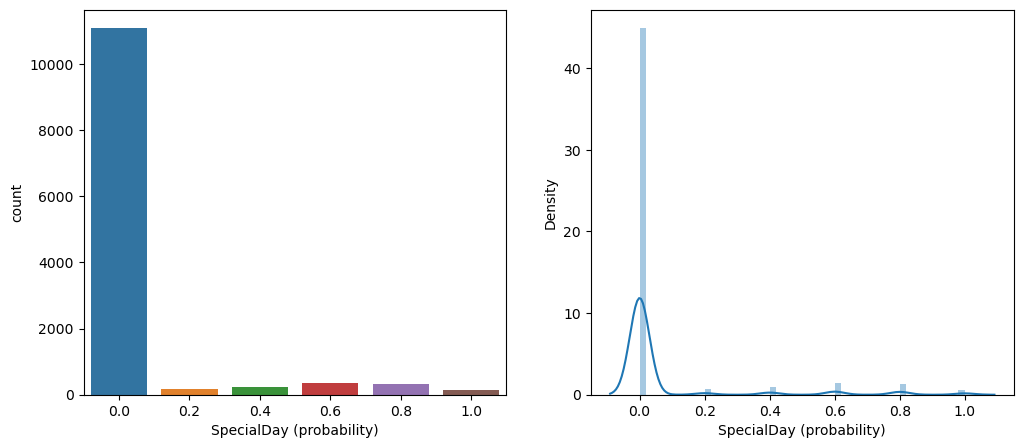

In [34]:
# Plot each feature to understand about each data
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x = 'SpecialDay (probability)')
plt.subplot(1,2,2)
sns.distplot(df['SpecialDay (probability)'])
plt.show()

# It is observed that almost 90% pagevisits and revenue generated page visits happened on non special day
# No significant effect of special days observed on Revenue.

In [35]:
num = X.select_dtypes(include = 'number')
char = X.select_dtypes(include = 'object')
bool = X.select_dtypes(include = 'boolean')

In [36]:
num.dtypes

Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates in %            float64
ExitRates in %              float64
PageValues                  float64
SpecialDay (probability)    float64
OperatingSystems              int64
Browser                       int64
Region                        int64
TrafficType                   int64
dtype: object

In [37]:
char.dtypes

Month          object
VisitorType    object
dtype: object

In [38]:
bool.dtypes

Weekend    bool
dtype: object

In [39]:
def unique_values(X):
    X = X.value_counts().count()
    return X
df_value_counts = pd.DataFrame(num.apply(lambda X: unique_values(X)))
df_value_counts

,0
Administrative,27
Administrative_Duration,3335
Informational,17
Informational_Duration,1258
ProductRelated,311
ProductRelated_Duration,9551
BounceRates in %,1872
ExitRates in %,4777
PageValues,2704
SpecialDay (probability),6


# Outlier Treatment - Numerical features

# Cappling and flooring

In [40]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
1%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.001250,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
5%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.004568,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
10%,0.000000,0.000000,0.000000,0.000000,3.000000,36.000000,0.000000,0.007449,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000


In [41]:
def outlier_cap(X):
    X=X.clip(lower=X.quantile(0.01))
    X=X.clip(upper=X.quantile(0.99))
    return(X)


In [42]:
num = num.apply(lambda X: outlier_cap(X))

In [43]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.285807,76.160053,0.485483,30.325103,30.825953,1152.751213,0.022191,0.043082,5.434185,0.061427,2.093106,2.340146,3.147364,4.069586
std,3.191369,141.779884,1.149464,104.383663,38.252586,1552.061772,0.048488,0.048588,14.843613,0.198917,0.774163,1.625229,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.001250,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
1%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.001250,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
5%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.004568,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
10%,0.000000,0.000000,0.000000,0.000000,3.000000,36.000000,0.000000,0.007449,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000


In [44]:
# Checking for null values

num.isnull().sum()

# As there are no null values so there is no need of imputation.

Administrative              0
Administrative_Duration     0
Informational               0
Informational_Duration      0
ProductRelated              0
ProductRelated_Duration     0
BounceRates in %            0
ExitRates in %              0
PageValues                  0
SpecialDay (probability)    0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
dtype: int64

# Univariate Analysis of continuous variables

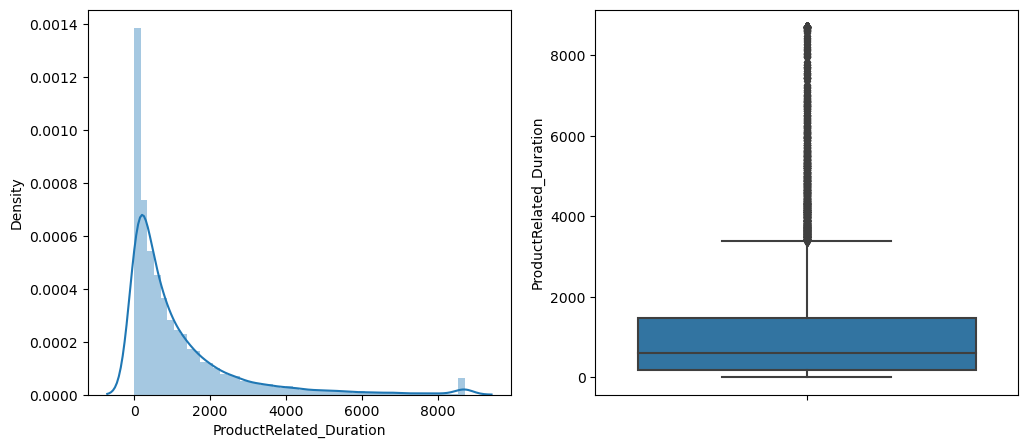

In [45]:
# Plot each feature to understand about each data  'ProductRelated_Duration', 'BounceRates in %', 'ExitRates in %', 'PageValues',
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.distplot(num['ProductRelated_Duration'])
plt.subplot(1,2,2)
sns.boxplot(y = num['ProductRelated_Duration'])
plt.show()


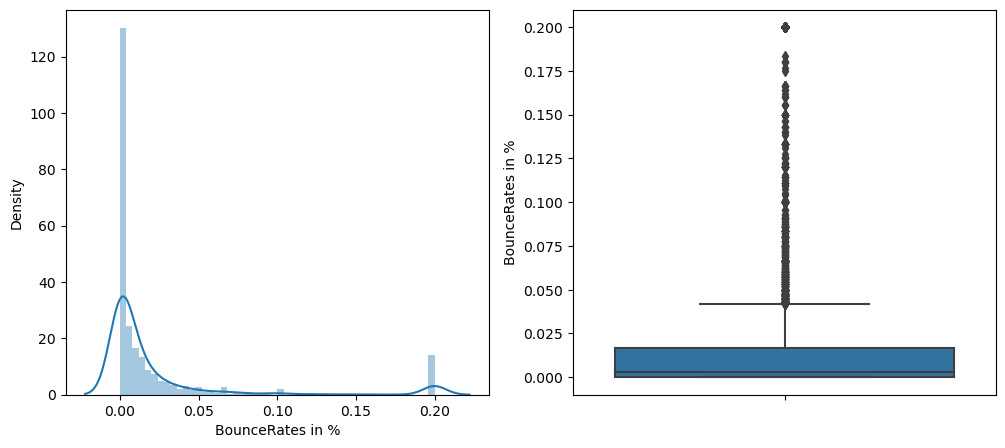

In [46]:
# Plot each feature to understand about each data
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.distplot(num['BounceRates in %'])
plt.subplot(1,2,2)
sns.boxplot(y = num['BounceRates in %'])
plt.show()


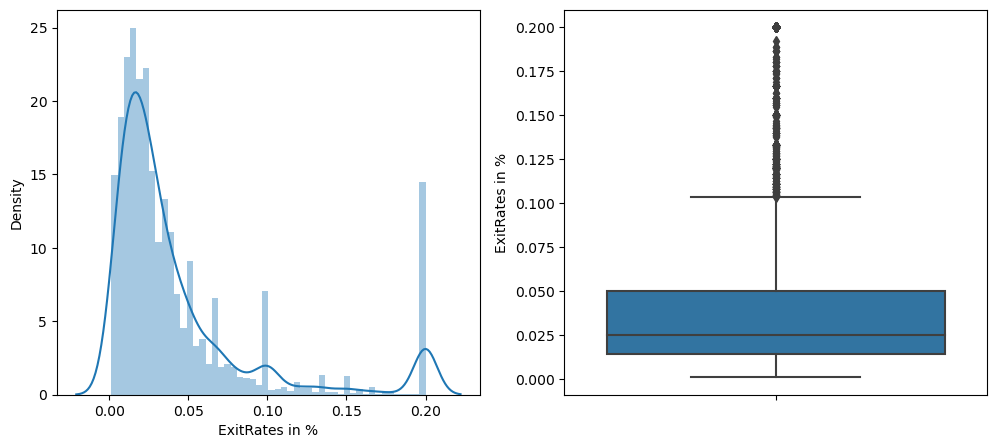

In [47]:
# Plot each feature to understand about each data
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.distplot(num['ExitRates in %'])
plt.subplot(1,2,2)
sns.boxplot(y = num['ExitRates in %'])
plt.show()


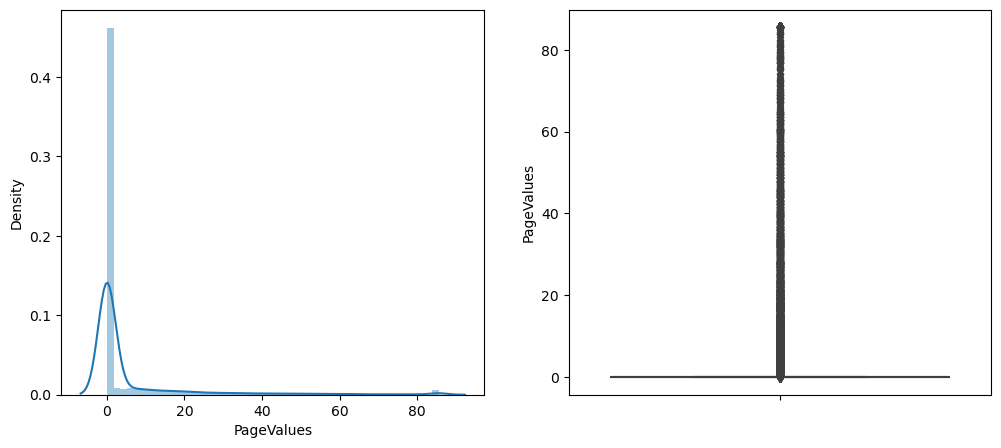

In [48]:
# Plot each feature to understand about each data
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.distplot(num['PageValues'])
plt.subplot(1,2,2)
sns.boxplot(y = num['PageValues'])
plt.show()

# Bivariate Analysis of Revenue and Other variables

<AxesSubplot:xlabel='Revenue', ylabel='Administrative_Duration'>

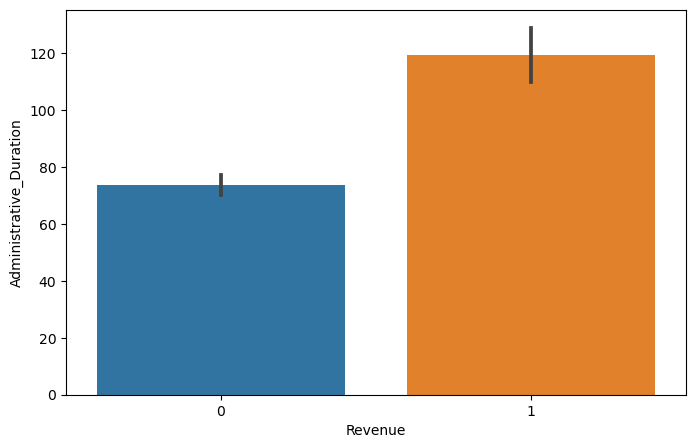

In [49]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'Revenue', y = 'Administrative_Duration', data = df)

# A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle 
# and provides some indication of the uncertainty around that estimate using error bars.
# It is also important to keep in mind that a bar plot shows only the mean (or other estimator) value.
# Below bar plot showing mean duration of Revenue generated Admin page visits is higher than non revenue visits.

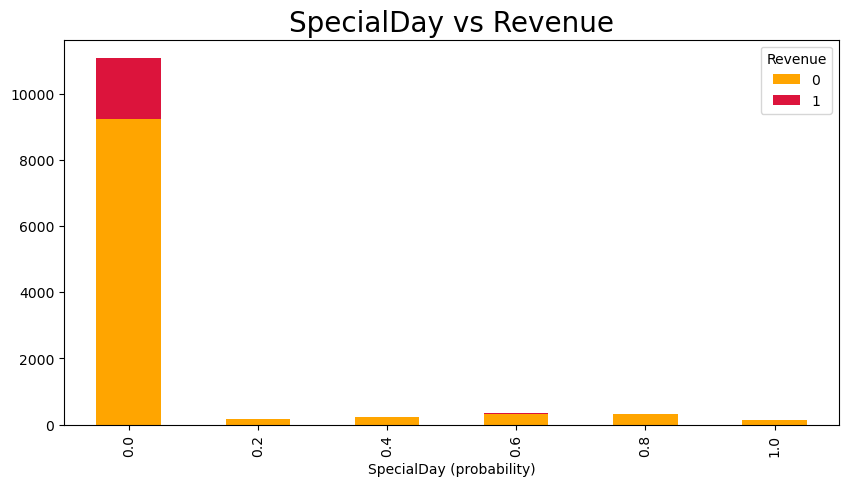

In [50]:
df1 = pd.crosstab(num['SpecialDay (probability)'], df['Revenue'])
df1.plot(kind = 'bar', stacked = True, color = ['orange', 'crimson'], figsize = (10, 5))
plt.title('SpecialDay vs Revenue', fontsize = 20 )
plt.show()

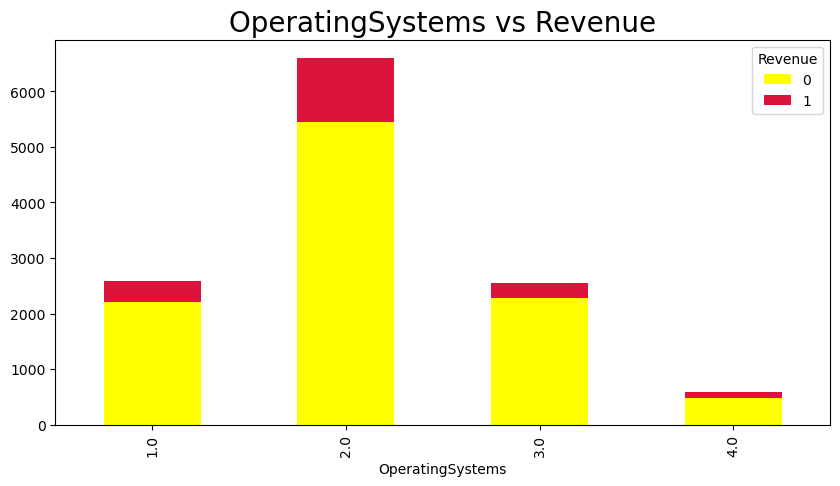

In [51]:
df1 = pd.crosstab(num['OperatingSystems'], df['Revenue'])
df1.plot(kind = 'bar', stacked = True, color = ['yellow', 'crimson'], figsize = (10, 5))
plt.title('OperatingSystems vs Revenue', fontsize = 20 )
plt.show()

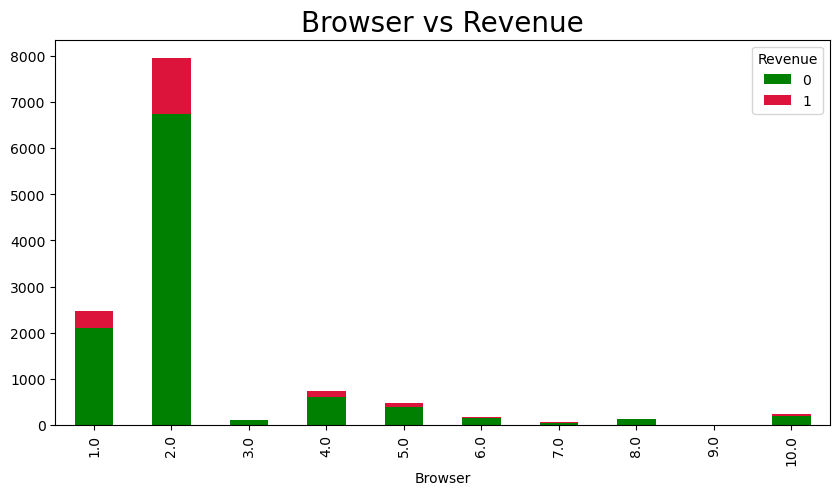

In [52]:
df1 = pd.crosstab(num['Browser'], df['Revenue'])
df1.plot(kind = 'bar', stacked = True, color = ['green', 'crimson'], figsize = (10, 5))
plt.title('Browser vs Revenue', fontsize = 20 )
plt.show()

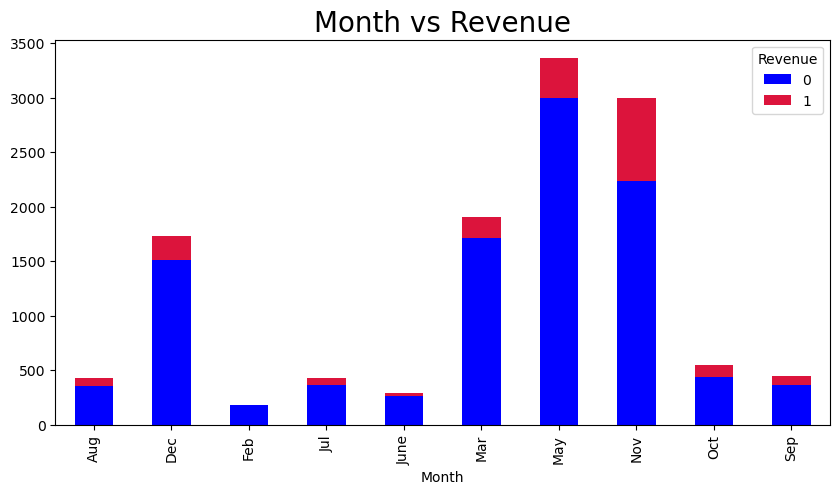

In [53]:
df1 = pd.crosstab(char['Month'], df['Revenue'])
df1.plot(kind = 'bar', stacked = True, color = ['blue', 'crimson'], figsize = (10, 5))
plt.title('Month vs Revenue', fontsize = 20 )
plt.show()

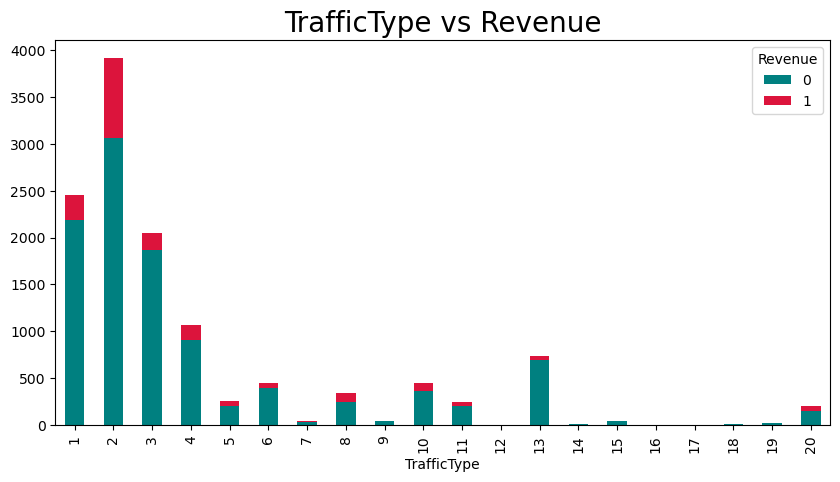

In [54]:
df1 = pd.crosstab(num['TrafficType'], df['Revenue'])
df1.plot(kind = 'bar', stacked = True, color = ['teal', 'crimson'], figsize = (10, 5))
plt.title('TrafficType vs Revenue', fontsize = 20 )
plt.show()

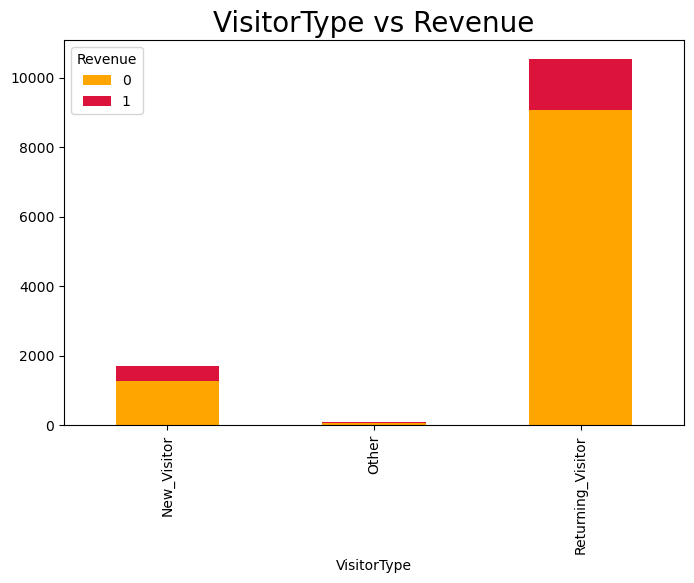

In [55]:
df1 = pd.crosstab(char['VisitorType'], df['Revenue'])
df1.plot(kind = 'bar', stacked = True, color = ['orange', 'crimson'], figsize = (8, 5))
plt.title('VisitorType vs Revenue', fontsize = 20 )
plt.show()

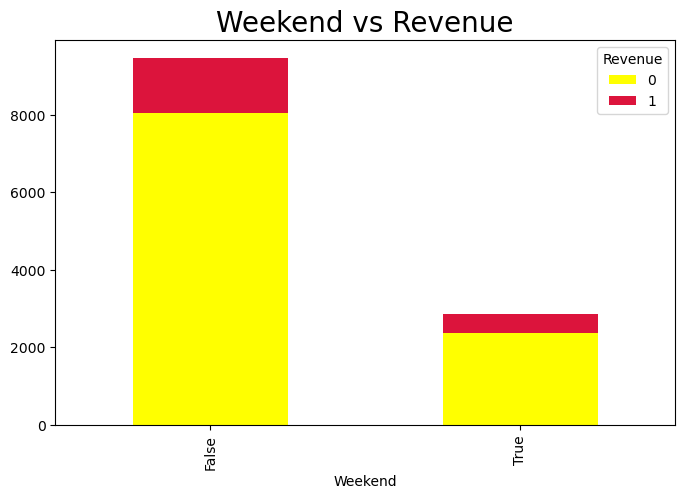

In [56]:
df1 = pd.crosstab(df['Weekend'], df['Revenue'])
df1.plot(kind = 'bar', stacked = True, color = ['yellow', 'crimson'], figsize = (8, 5))
plt.title('Weekend vs Revenue', fontsize = 20 )
plt.show()

# Data Preprocessing

# Create the Master Feature set for Model development

In [57]:
X_all = pd.concat([num, char, bool], axis = 1)

In [58]:
X_all.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),OperatingSystems,Browser,Region,TrafficType,Month,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,1.0,1.0,1,1,Feb,Returning_Visitor,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,2.0,2.0,1,2,Feb,Returning_Visitor,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,4.0,1.0,9,3,Feb,Returning_Visitor,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,3.0,2.0,2,4,Feb,Returning_Visitor,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,3.0,3.0,1,4,Feb,Returning_Visitor,True
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,2.0,2.0,1,3,Feb,Returning_Visitor,False
6,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,2.0,4.0,3,3,Feb,Returning_Visitor,False
7,1.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,1.0,2.0,1,5,Feb,Returning_Visitor,True
8,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,2.0,2.0,2,3,Feb,Returning_Visitor,False
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,2.0,4.0,1,2,Feb,Returning_Visitor,False


In [59]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Administrative            12330 non-null  float64
 1   Administrative_Duration   12330 non-null  float64
 2   Informational             12330 non-null  float64
 3   Informational_Duration    12330 non-null  float64
 4   ProductRelated            12330 non-null  float64
 5   ProductRelated_Duration   12330 non-null  float64
 6   BounceRates in %          12330 non-null  float64
 7   ExitRates in %            12330 non-null  float64
 8   PageValues                12330 non-null  float64
 9   SpecialDay (probability)  12330 non-null  float64
 10  OperatingSystems          12330 non-null  float64
 11  Browser                   12330 non-null  float64
 12  Region                    12330 non-null  int64  
 13  TrafficType               12330 non-null  int64  
 14  Month 

In [60]:
# One hot encoding of object variables

X_all = pd.get_dummies(X_all)
X_all.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),OperatingSystems,Browser,Region,TrafficType,Weekend,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,1.0,1.0,1,1,False,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2.0,2.0,1,2,False,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,4.0,1.0,9,3,False,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,3.0,2.0,2,4,False,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,3.0,3.0,1,4,True,0,0,1,0,0,0,0,0,0,0,0,0,1


In [61]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  float64
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  float64
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  float64
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates in %               12330 non-null  float64
 7   ExitRates in %                 12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay (probability)       12330 non-null  float64
 10  OperatingSystems               12330 non-null  float64
 11  Browser                        12330 non-null  float64
 12  Region                         12330 non-null 

In [62]:
# Label encoding of Weekend

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_all['Weekend'] = le.fit_transform(X_all['Weekend'])
X_all['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [63]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  float64
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  float64
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  float64
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates in %               12330 non-null  float64
 7   ExitRates in %                 12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay (probability)       12330 non-null  float64
 10  OperatingSystems               12330 non-null  float64
 11  Browser                        12330 non-null  float64
 12  Region                         12330 non-null 

In [64]:
y.value_counts()

# A data set is called imbalanced if 2*minor < major.  Hence this is imbalanced dataset and need to be balanced
# using Ramdom over sampler

0    10422
1     1908
Name: Revenue, dtype: int64

In [65]:
# Split the dataset in to Train and Test components.

from sklearn.model_selection import train_test_split, GridSearchCV

xTrain, xTest, yTrain, yTest = train_test_split(X_all, y, test_size = 0.2, random_state = 5)

In [66]:
from sklearn.model_selection import StratifiedKFold
sf = StratifiedKFold(n_splits = 10)

sf.get_n_splits(xTrain, yTrain)
print(sf)

    
for i, (train_index, test_index) in enumerate(sf.split(xTrain, yTrain)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Fold 0:
  Train: index=[ 987  988  989 ... 9861 9862 9863]
  Test:  index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212

In [1]:
pip install imbalanced-learn

  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataprep 0.4.5 requires jinja2<3.1,>=3.0, but you have jinja2 2.11.3 which is incompatible.
dataprep 0.4.5 requires regex<2022.0.0,>=2021.8.3, but you have regex 2022.7.9 which is incompatible.


In [68]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_train_ros, y_train_ros = ros.fit_resample(xTrain, yTrain)
print(yTrain.value_counts())
print("############")
print(y_train_ros.value_counts())

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
x_test_ros, y_test_ros = ros.fit_resample(xTest, yTest)
print(yTest.value_counts())
print("############")
print(y_test_ros.value_counts())

In [ ]:
print(x_train_ros.shape)
print(y_train_ros.shape)

In [ ]:
print(x_test_ros.shape)
print(y_test_ros.shape)

In [72]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train_smt, y_train_smt = smt.fit_resample(xTrain, yTrain)
print(yTrain.value_counts())
print("############")
print(y_train_smt.value_counts())

0    8320
1    1544
Name: Revenue, dtype: int64
############
0    8320
1    8320
Name: Revenue, dtype: int64


In [73]:
x_test_smt, y_test_smt = smt.fit_resample(xTest, yTest)
print(yTest.value_counts())
print("############")
print(y_test_smt.value_counts())

0    2102
1     364
Name: Revenue, dtype: int64
############
0    2102
1    2102
Name: Revenue, dtype: int64


In [74]:
print(x_train_smt.shape)
print(y_train_smt.shape)

(16640, 28)
(16640,)


In [75]:
print(x_test_smt.shape)
print(y_test_smt.shape)

(4204, 28)
(4204,)


In [76]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_train_rus, y_train_rus = rus.fit_resample(xTrain, yTrain)
print(yTrain.value_counts())
print("############")
print(y_train_rus.value_counts())

0    8320
1    1544
Name: Revenue, dtype: int64
############
0    1544
1    1544
Name: Revenue, dtype: int64


In [77]:
print(x_train_rus.shape)
print(y_train_rus.shape)

(3088, 28)
(3088,)


In [ ]:
x_test_rus, y_test_rus = rus.fit_resample(xTest, yTest)
print(yTest.value_counts())
print("############")
print(y_test_rus.value_counts())

In [ ]:
print(x_test_rus.shape)
print(y_test_rus.shape)

In [78]:
# All the features have values in various ranges hence we need to apply scaling to bring them to comparable values.  
# Hence applying StandardScaler to do so
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
xTrain = ss.fit_transform(x_train_smt)
xTest = ss.transform(x_test_smt)
yTrain = y_train_smt
yTest = y_test_smt

In [79]:
# check the performance metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix, auc, roc_curve

In [80]:
# instantiate the logistic Regression model and fit the dataset in to the model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Instantiating the model
lr = LogisticRegression()

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, auc, roc_curve, roc_auc_score

In [81]:
# Model-1
classifier = LogisticRegression(C = 0.4, max_iter = 1000, solver = 'liblinear', random_state = 10)
lr = classifier.fit(xTrain, yTrain)
# Prediction
y_pred_lr_train = classifier.predict(xTrain)
y_pred_lr_test = classifier.predict(xTest)
# accuracy
accuracy_LR_train = accuracy_score(yTrain, y_pred_lr_train)
accuracy_LR_test = accuracy_score(yTest, y_pred_lr_test)
print(accuracy_LR_train)
print(accuracy_LR_test)


0.9118389423076924
0.9065176022835395


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_dict = ({
    'penalty' : ['l1','l2','elasticnet'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter' : [10, 20, 50, 100],
})

In [ ]:
grid_search_lr = GridSearchCV(lr, param_grid= param_dict, cv=5, n_jobs=-1 , scoring= 'recall_macro', verbose=4)

In [ ]:
grid_search_lr.fit(xTrain, yTrain)

In [ ]:
grid_search_lr.best_params_

In [ ]:
model_lr = grid_search.best_estimator_
model_lr

In [ ]:
lr1 = model_lr.fit(xTrain, yTrain)
# Prediction
y_pred_lr1_train = model_lr.predict(xTrain)
y_pred_lr1_test = model_lr.predict(xTest)
# accuracy
accuracy_LR1_train = accuracy_score(yTrain, y_pred_lr_train)
accuracy_LR1_test = accuracy_score(yTest, y_pred_lr_test)
print(accuracy_LR1_train)
print(accuracy_LR1_test)


In [ ]:
# Model - 2
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(random_state = 10)
dt = classifier2.fit(xTrain, yTrain)
# predict
y_pred_dt_train = classifier2.predict(xTrain)
y_pred_dt_test = classifier2.predict(xTest)
# accuracy
accuracy_dt_train = accuracy_score(yTrain, y_pred_dt_train)
accuracy_dt_test = accuracy_score(yTest, y_pred_dt_test)
print(accuracy_dt_train)
print(accuracy_dt_test)

In [ ]:
grid_search_dt = GridSearchCV(dt, param_grid={'max_depth':range(5,30,5),'min_samples_split':[2,3,4,5]}, cv=5, n_jobs=-1 , scoring= 'recall_macro', verbose=4)

In [ ]:
grid_search_dt.fit(xTrain, yTrain)

In [ ]:
grid_search_dt.best_params_

In [ ]:
model_dt = grid_search_dt.best_estimator_
model_dt

In [ ]:
dt1 = model_dt.fit(xTrain, yTrain)
# predict
y_pred_dt1_train = model_dt.predict(xTrain)
y_pred_dt1_test = model_dt.predict(xTest)
# accuracy
accuracy_dt1_train = accuracy_score(yTrain, y_pred_dt1_train)
accuracy_dt1_test = accuracy_score(yTest, y_pred_dt1_test)
print(accuracy_dt1_train)
print(accuracy_dt1_test)

In [ ]:
# Model - 3
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(random_state = 10)
rfi = classifier3.fit(xTrain, yTrain)
# prediction
y_pred_rfi_train = classifier3.predict(xTrain)
y_pred_rfi_test = classifier3.predict(xTest)
# accuracy
accuracy_rfi_train = accuracy_score(yTrain, y_pred_rfi_train)
accuracy_rfi_test = accuracy_score(yTest, y_pred_rfi_test)
print(accuracy_rfi_train)
print(accuracy_rfi_test)

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

#calibrated_forest = CalibratedClassifierCV(estimator=RandomForestClassifier(n_estimators=10))

grid_search_rfi = GridSearchCV(rfi, param_grid={'max_depth': [2, 4, 6, 8]}, cv=5)

In [ ]:
model_rfi = grid_search_rfi.fit(xTrain, yTrain)
model_rfi

In [ ]:
model_rfi = grid_search_rfi.best_estimator_
model_rfi

In [ ]:
rfi1 = model_rfi.fit(xTrain, yTrain)
# prediction
y_pred_rfi1_train = model_rfi.predict(xTrain)
y_pred_rfi1_test = model_rfi.predict(xTest)
# accuracy
accuracy_rfi1_train = accuracy_score(yTrain, y_pred_rfi1_train)
accuracy_rfi1_test = accuracy_score(yTest, y_pred_rfi1_test)
print(accuracy_rfi1_train)
print(accuracy_rfi1_test)

In [ ]:
# Model - 4
from sklearn.ensemble import RandomForestClassifier
classifier4 = RandomForestClassifier(criterion = 'entropy', random_state = 10)
rfe = classifier4.fit(xTrain, yTrain)
# prediction
y_pred_rfe_train = classifier4.predict(xTrain)
y_pred_rfe_test = classifier4.predict(xTest)

# accuracy
accuracy_rfe_train = accuracy_score(yTrain, y_pred_rfe_train)
accuracy_rfe_test = accuracy_score(yTest, y_pred_rfe_test)

print(accuracy_rfe_train)
print(accuracy_rfe_test)

In [ ]:
grid_search_rfe = GridSearchCV(rfe, param_grid={'max_depth': [2, 4, 6, 8]}, cv=5)
grid_search_rfe

In [ ]:
model_rfe = grid_search_rfe.fit(xTrain, yTrain)
model_rfe

In [ ]:
model_rfe = grid_search_rfe.best_estimator_
model_rfe

In [ ]:
rfe1 = model_rfe.fit(xTrain, yTrain)
# prediction
y_pred_rfe1_train = model_rfe.predict(xTrain)
y_pred_rfe1_test = model_rfe.predict(xTest)

# accuracy
accuracy_rfe1_train = accuracy_score(yTrain, y_pred_rfe1_train)
accuracy_rfe1_test = accuracy_score(yTest, y_pred_rfe1_test)

print(accuracy_rfe1_train)
print(accuracy_rfe1_test)

In [ ]:
# Model - 5
from sklearn.svm import SVC
model_svm = SVC(random_state = 10)
SVM = model_svm.fit(xTrain, yTrain)
# prediction
y_pred_svm_train = model_svm.predict(xTrain)
y_pred_svm_test = model_svm.predict(xTest)

# accuracy
accuracy_svm_train = accuracy_score(yTrain, y_pred_svm_train)
accuracy_svm_test = accuracy_score(yTest, y_pred_svm_test)

print(accuracy_svm_train)
print(accuracy_svm_test)

In [ ]:
# combine all the models using voting classifier model

from sklearn.ensemble import VotingClassifier
model_evc = VotingClassifier(estimators = [('lr',lr1),('dt',dt1),('rfi',rfi1),('rfe',rfe1),('SVC', SVM)])
evc = model_evc.fit(xTrain, yTrain)
y_pred_evc = model_evc.predict(xTest)
accuracy_evc = accuracy_score(yTest, y_pred_evc)

list1 = ['Logistic Regression', 'Decision Tree', 'Random Forest Gini', 'Random Forest entropy', 'Support Vector', 'Voting Classifier']

list2 = [accuracy_LR1_test, accuracy_dt1_test, accuracy_rfi1_test, accuracy_rfe1_test, accuracy_svm_test, accuracy_evc]

list3 = [model_lr, model_dt, model_rfi, model_rfe, model_svm, model_evc]

df_accuracy = pd.DataFrame({'Method Used':list1, 'Accuracy':list2})
print(df_accuracy)

plt.figure(figsize = (14,8))
charts = sns.barplot(x = 'Method Used', y = 'Accuracy', data = df_accuracy)
print(charts)
                

In [ ]:
import pandas as pd
feature_importances=pd.DataFrame(model_rfi.feature_importances_,
                                 index=X_all.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix


# evaluation
# Random Forest
y_pred_lr1_train = model_lr.predict(xTrain)
y_pred_lr1 = model_lr.predict(xTest)

y_pred_dt1_train = model_dt.predict(xTrain)
y_pred_dt1 = model_dt.predict(xTest)

y_pred_rfi1_train = model_rfi.predict(xTrain)
y_pred_rfi1 = model_rfi.predict(xTest)

y_pred_svm_train = model_svm.predict(xTrain)
y_pred_svm = model_svm.predict(xTest)

y_pred_evc_train = model_evc.predict(xTrain)
y_pred_evc = model_evc.predict(xTest)


In [ ]:
print("Accuracy:",metrics.accuracy_score(yTest, y_pred_lr1))
print("Precision",metrics.precision_score(yTest,y_pred_lr1))
print("Recall",metrics.recall_score(yTest,y_pred_lr1))
print("f1_score",metrics.f1_score(yTest,y_pred_lr1))

In [ ]:
metrics.plot_confusion_matrix(lr1,xTest,yTest)

In [ ]:
print("Accuracy:",metrics.accuracy_score(yTest, y_pred_dt1))
print("Precision",metrics.precision_score(yTest,y_pred_dt1))
print("Recall",metrics.recall_score(yTest,y_pred_dt1))
print("f1_score",metrics.f1_score(yTest,y_pred_dt1))

In [ ]:
metrics.plot_confusion_matrix(dt1,xTest,yTest)

In [ ]:
print("Accuracy:",metrics.accuracy_score(yTest, y_pred_rfi1))
print("Precision",metrics.precision_score(yTest,y_pred_rfi1))
print("Recall",metrics.recall_score(yTest,y_pred_rfi1))
print("f1_score",metrics.f1_score(yTest,y_pred_rfi1))

In [ ]:
metrics.plot_confusion_matrix(rfi1,xTest,yTest)

In [ ]:
print("Accuracy:",metrics.accuracy_score(yTest, y_pred_svm))
print("Precision",metrics.precision_score(yTest,y_pred_svm))
print("Recall",metrics.recall_score(yTest,y_pred_svm))
print("f1_score",metrics.f1_score(yTest,y_pred_svm))

In [ ]:
metrics.plot_confusion_matrix(SVM,xTest,yTest)

In [ ]:
print("Accuracy:",metrics.accuracy_score(yTest, y_pred_evc))
print("Precision",metrics.precision_score(yTest,y_pred_evc))
print("Recall",metrics.recall_score(yTest,y_pred_evc))
print("f1_score",metrics.f1_score(yTest,y_pred_evc))

In [ ]:
metrics.plot_confusion_matrix(evc,xTest,yTest)

In [ ]:
print(classification_report(yTest, y_pred_lr1 ))
print('#########################################')
print(classification_report(yTest, y_pred_dt1 ))
print('#########################################')
print(classification_report(yTest, y_pred_rfi1 ))
print('#########################################')
print(classification_report(yTest, y_pred_svm ))
print('#########################################')
print(classification_report(yTest, y_pred_evc))



In [ ]:
y_pred_prob = rfi1.predict_proba(xTest)[::,1]
y_pred_prob

In [ ]:
# metrics.roc_curve returns three outputs, fpr, tpr and different thresholds
fpr, tpr, threshold = roc_curve(yTest, y_pred_prob)

auc = roc_auc_score(yTest, y_pred_prob)

# plotting AUC curve
plt.figure(figsize = (10,6))
plt.plot(fpr, tpr, label = 'auc = '+str(auc))
plt.title('Receiver Operating Characteristics Curve (ROC)')
plt.legend(loc = 4)
plt.xlabel('FPR ----->')
plt.ylabel('TPR ------>')
plt.show()

In [ ]:
precision = ['Random Forest(entropy)', 'precision', 0.92, 0.94]
recall = ['Random Forest(entropy)', 'recall', 0.94, 0.92]
f1_score = ['Random Forest(entropy)', 'f1_score', 0.93, 0.93 ]
precision2 = ['Support Vector Machine', 'precision', 0.90, 0.93 ]
recall2 = ['Support Vector Machine', 'recall', 0.94, 0.89 ]
f1_score2 = ['Support Vector Machine', 'f1_score', 0.92, 0.91 ]
precision3 = ['Voting Classifier', 'precision', 0.91, 0.94 ]
recall3 = ['Voting Classifier', 'recall', 0.95, 0.91 ]
f1_score3 = ['Voting Classifier', 'f1_score', 0.93, 0.92 ]
precision4 = ['Logistic Regression', 'precision', 0.89, 0.94]
recall4 = ['Logistic Regression', 'recall', 0.94, 0.88]
f1_score4 = ['Logistic Regression', 'f1_score', 0.91, 0.91 ]
precision5 = ['Decision Tree', 'precision', 0.88, 0.91 ]
recall5 = ['Decision Tree', 'recall', 0.91, 0.88 ]
f1_score5 = ['Decision Tree', 'f1_score', 0.90, 0.89 ]
table = pd.DataFrame([precision, precision2, precision3, precision4, precision5, recall, recall2, recall3, recall4, recall5, f1_score, f1_score2, f1_score3, f1_score4, f1_score5])
table.columns = ['model_name', 'metrics', 'Is_Revenue(False)', 'Is_Revenue(True)']
table
 